### Gaussian data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ---------- generating training data
N_pix = 16 # square root of the dimension
sig = 1. # standard deviation
start = -1
end = 1
N_pos = 31 # number of positions
shift = (end-start)/(N_pos-1)
N = 20000 # number of data points per position
sample = np.zeros(shape=(N_pos, N, N_pix, N_pix))
for count in range(N_pos):
    position = start + count * shift
    for ii in range(N_pix):
        for jj in range(N_pix):
            sample[count,:,   ii,jj] = np.random.normal(position, sig, size=N)
np.save('normal_data.npy', sample)

In [3]:
# ---------- generating testing data for evaluating the FI
shift = 0.03 # step size
N_pos = 1 # number of positions
N = 150000 # number of speckles per position
sample = np.zeros(shape=(3*N_pos, N, N_pix, N_pix))
for count in range(N_pos):
    position = 0 # (count-1) * shift if an extended range of parameters is used
    for ii in range(N_pix):
        for jj in range(N_pix):            
            sample[3*count,:,   ii,jj] = np.random.normal(position-shift, sig, size=N)
            sample[3*count+1,:,   ii,jj] = np.random.normal(position, sig, size=N)
            sample[3*count+2,:,   ii,jj] = np.random.normal(position+shift, sig, size=N)
np.save('normal_data_test.npy', sample)

In [4]:
# ---------- generating training data to observe early stopping
N_pix = 16
sig = 1.
start = -1.5
end = 1.5
N_pos = 101
shift = (end-start)/(N_pos-1)
N = 7000
sample = np.zeros(shape=(N_pos, N, N_pix, N_pix))
for count in range(N_pos):
    position = start + count * shift
    for ii in range(N_pix):
        for jj in range(N_pix):
            sample[count,:,   ii,jj] = np.random.normal(position, sig, size=N)
np.save('normal_data_ES.npy', sample)

### Lognormal data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# ---------- generating training data
dim = 10 # dimension
sig = 1. # standard deviation
start = -7
end = 7
N_pos = 21 # number of positions
shift = (end-start)/(N_pos-1)
N = 20000
#np.random.seed(30)
trafo = np.random.normal(0.,1.,size=(dim,dim)) # transformation to correlate the Gaussian data
sample = np.zeros(shape=(N_pos, N, dim))
positions = np.zeros(shape=(N_pos, N,1))
for count in range(N_pos):
    position = start + count * shift
    positions[count] = position
    for ii in range(dim):
        sample[count,:,   ii] = np.random.normal(position, sig, size=N)
sample = np.einsum('ij,abi->abj', trafo, sample)
sample = sample / dim
sample = np.exp(sample) # exponentiate to get lognormal data
np.save('ES_log_normal_train_X.npy', sample)
np.save('ES_log_normal_train_Y.npy', positions)

In [11]:
# ---------- generating testing data for evaluating the FI
delta = 0.1
N_pos = 1
start = 0.
end = 0.
shift = 0.
N = 150000 # number of speckles per position
sample = np.zeros(shape=(3*N_pos, N, dim))
for count in range(N_pos):
    position = start + count * shift
    print(position)
    for ii in range(dim):
        sample[3*count,:,ii] = np.random.normal(position-delta, sig, size=N)
        sample[3*count+1,:,ii] = np.random.normal(position, sig, size=N)
        sample[3*count+2,:,ii] = np.random.normal(position+delta, sig, size=N)
sample = np.einsum('ij,abi->abj', trafo, sample)
sample = sample / dim
sample = np.exp(sample)      
np.save('log_normal_test_X.npy', sample)

0.0


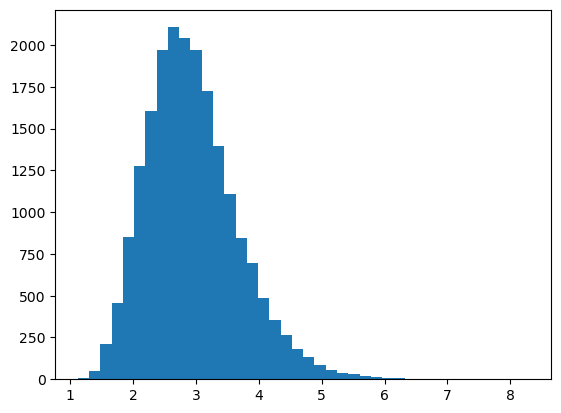

In [17]:
# ---------- plotting an exemplary marginal distribution
plt.hist(sample[1,:,2],bins=40)
plt.show()